In [2]:
import numpy as np

In [3]:
#load_py = np.load('D:/UnrealData/apartment_room_all.npy')

In [66]:
load_py = np.load('D:/UnrealData/slicing_sample_data500.npy')

In [5]:
load_py.shape

(18, 84, 93, 101, 500)

## 예제 데이터 Port8083 단면도 값 지정

In [6]:
time = -1
kind = 6
#PV port 8081
flattened_array = load_py[1, :, :, :, time]

#port 8082
selectXYZ = 1
temp = np.rot90(flattened_array, 1, axes=(0,2))
# Port8083z = temp.max(axis=0).reshape(-1)
# Port8083y = temp.max(axis=1).reshape(-1)
# Port8083x = temp.max(axis=2).reshape(-1)
Port8083z = temp.max(axis=0)
Port8083y = temp.max(axis=1)
Port8083x = temp.max(axis=2)



In [7]:
Port8083z.shape

(93, 84)

In [8]:
Port8083y.shape

(101, 84)

In [9]:
Port8083x.shape

(101, 93)

## 예제 데이터 openCV를 통해 100,100으로 바꾸기

In [10]:
import cv2
import matplotlib.pyplot as plt

In [11]:
resized_array = cv2.resize(Port8083z, (100, 100), interpolation=cv2.INTER_LINEAR)
print(resized_array.shape)  # (100, 100)

(100, 100)


In [12]:
resized_array

array([[0.00038641, 0.00038641, 0.00038641, ..., 0.00320078, 0.00306522,
        0.00277401],
       [0.00038641, 0.00038641, 0.00038641, ..., 0.00332846, 0.00292585,
        0.00267979],
       [0.00038641, 0.00038641, 0.00038641, ..., 0.00261818, 0.00257598,
        0.0024794 ],
       ...,
       [0.00038641, 0.00038641, 0.00038641, ..., 0.00178648, 0.00140504,
        0.00108873],
       [0.00038641, 0.00038641, 0.00038641, ..., 0.00199206, 0.00171049,
        0.00167488],
       [0.00038641, 0.00038641, 0.00038641, ..., 0.0020901 , 0.00184118,
        0.00163218]], dtype=float32)

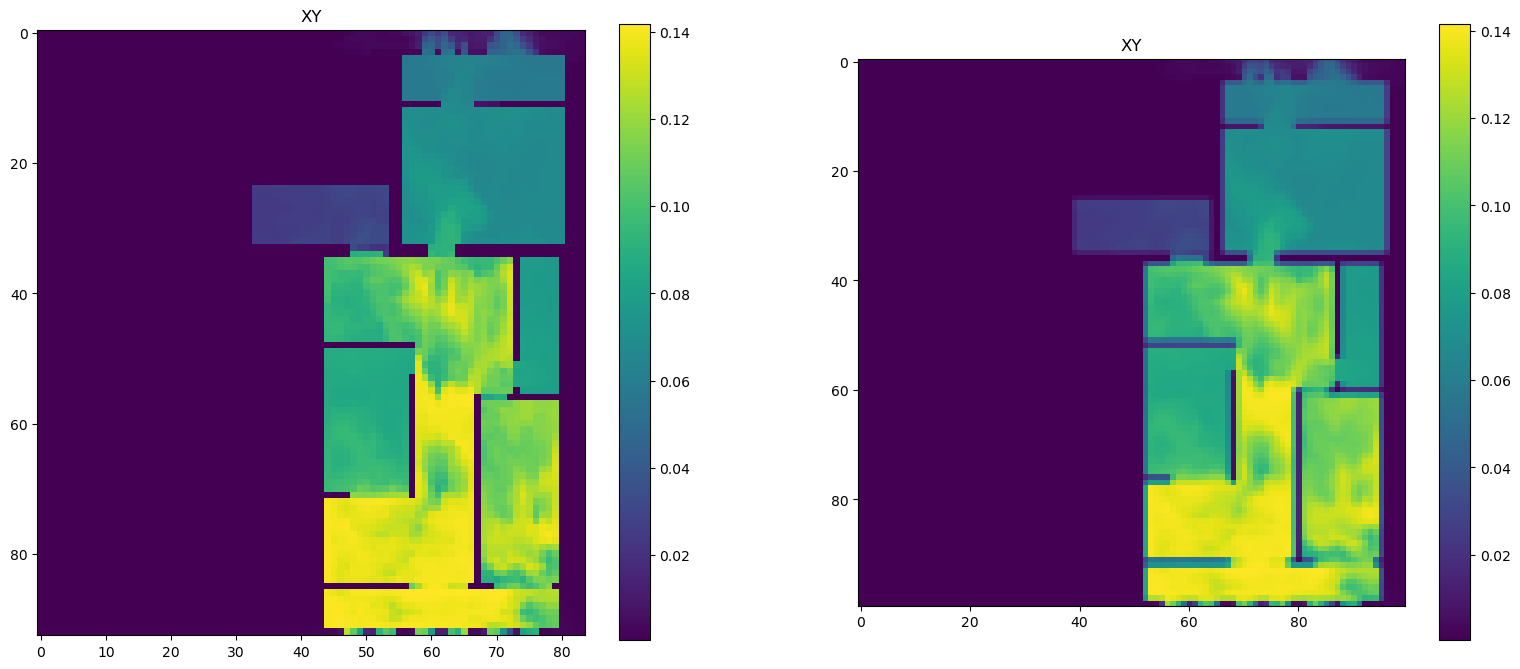

In [13]:
# 그래프 크기 설정
plt.figure(figsize=(30, 8))



# 첫 번째 서브플롯: XY 평면도 총합 -> Z
plt.subplot(1, 3, 1)
plt.imshow(Port8083z)  # 흑백 컬러맵 설정
plt.title('XY')
plt.colorbar()  # 색상 막대 추가

# 첫 번째 서브플롯: XY 평면도 총합 -> Z
plt.subplot(1, 3, 2)
plt.imshow(resized_array)  # 흑백 컬러맵 설정
plt.title('XY')
plt.colorbar()  # 색상 막대 추가

plt.show()

In [14]:
load_py.shape

(18, 84, 93, 101, 500)

In [15]:
print(len(load_py[6, 0, 0, :, 0]))

101


In [16]:
load_py.shape

(18, 84, 93, 101, 500)

In [17]:
load_py.shape[-1]-500

0

## Port8081 PV값 보내주기

In [18]:

flattened_array = load_py[6, :, :, :, -2]
x, y, z = 10, 10, 10
flattened_array = flattened_array[x:x+10, y:y+10, z:z+5]

In [19]:
load_py.shape[4]

500

In [20]:
load_py[6, :, :, :, -2] == load_py[6, :, :, :, load_py.shape[4]-2]

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [21]:
flattened_array.shape

(10, 10, 5)

## 데이터 matplotlib로 보기

In [22]:
import matplotlib.pyplot as plt

In [23]:
load_py.shape

(18, 84, 93, 101, 500)

[0.00038641 0.00038641 0.00038641 ... 0.00221204 0.00190718 0.00163218]


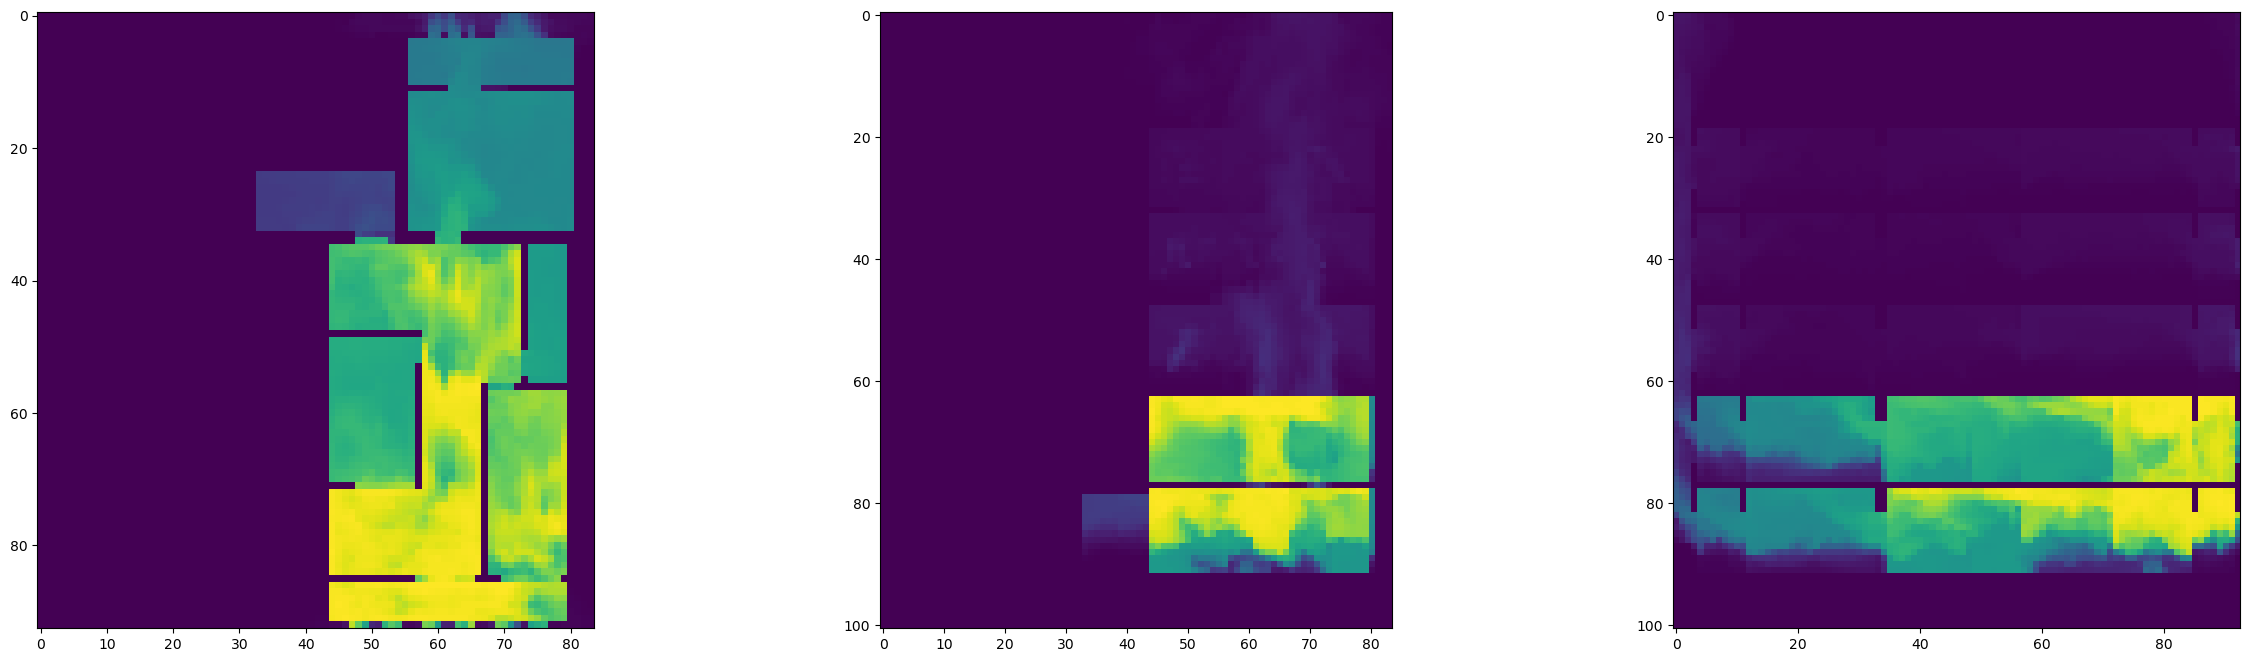

In [24]:
# 시간 정하기
time = -1
temp = load_py[1, :, :, :, time]

temp = np.rot90(temp, 1, axes=(0,2))

plt.figure(figsize=(30,8))

# xy 평면도 총합 -> z
plt.subplot(1, 3, 1)
plt.imshow(temp.max(axis=0))
print(temp.max(axis=0).reshape(-1))
plt.savefig('D:/UnrealData/sample_z.png')

 # xz 평면도 총합 -> Y
plt.subplot(1, 3, 2)
plt.imshow(temp.max(axis=1))
plt.savefig('D:/UnrealData/sample_y.png')

# yz 평면도 총합 -> X
plt.subplot(1, 3, 3)
plt.imshow(temp.max(axis=2))
plt.savefig('D:/UnrealData/sample_x.png')

In [25]:
temp.shape

(101, 93, 84)

In [26]:
temp.dtype

dtype('float32')

In [27]:
temp.max(axis=0).shape

(93, 84)

In [28]:
temp.max(axis=1).shape

(101, 84)

In [29]:
temp.max(axis=2).shape

(101, 93)

In [30]:
temp.max(axis=0).reshape(-1).shape

(7812,)

In [31]:
print(temp.max(axis=0).reshape(-1))

[0.00038641 0.00038641 0.00038641 ... 0.00221204 0.00190718 0.00163218]


In [32]:
# 8082 테스트

In [94]:
from datetime import datetime

KIND_PV_LENGTH = 7

In [147]:
import numpy as np
from datetime import datetime

message = "KI1101000LO890.000000,850.000000,158.337502TN00:00:27.529TF20"
KIND_PV_LENGTH = 7

# 'KI' 위치 찾기
message_idx = message.find('KI')

# 초기 변수 선언
kind_pv_arr = []
location_xyz = []  # 기본값을 설정하여 IndexError 방지
now_time_str = ""
future_time_str = ""

# 'KI'가 있는지 확인
if message_idx != -1:
    # 구독된 Kind PV를 담음
    kind_pv_arr = message[(message_idx + 2):(message_idx + 2 + KIND_PV_LENGTH)]
    message_idx += 2 + KIND_PV_LENGTH

    # 'TN' 위치 찾기
    end_idx = message.find('TN')

    # TN이 존재할 경우
    if end_idx != -1:
        message_idx += 2
        # 사용자의 위치가 담긴 location 배열
        location_xyz_str = message[message_idx:end_idx - 1].split(',')
        
        if len(location_xyz_str) >= 3:  # 위치 값이 세 개 이상일 경우에만 처리
            location_xyz_str = np.array(location_xyz_str, dtype=float)
            location_xyz = np.floor(location_xyz_str)
        else:
            print("Invalid location data, using default [0, 0, 0]")  # 위치 데이터가 없을 때 경고 출력
        
        # TN 이후 부분에서 시간 정보 찾기
        message_idx = end_idx + 2
        for i in range(message_idx, len(message)):
            if message[i] != 'T':
                end_idx = i
            else:
                break
        
        # 시간 정보 문자열을 추출
        now_time_str = message[message_idx:end_idx]
        print(f"Extracted now_time_str: {now_time_str}")  # 디버깅 출력
        
        if not now_time_str:  # now_time_str가 빈 문자열일 경우 기본값 설정
            now_time_str = "00:00:00.000"
            print("now_time_str is empty, setting default value '00:00:00.000'")
        
        if end_idx != len(message):
            future_time_str = message[end_idx + 3:]           

    print(kind_pv_arr, " ", location_xyz, " ", now_time_str, " ", future_time_str)

Extracted now_time_str: 00:00:27.52
1101000   [890. 850. 158.]   00:00:27.52   20


In [148]:
future_time = int(future_time_str) 

check = 0
for i in range(1, 6):
    addition = int(future_time // 5)
    if addition == 0:
        addition = 1
        check += 1
        break
    check += 1
        

response = ""
try:
    parsed_time = datetime.strptime(k, "%H:%M:%S.%f")
except ValueError as e:
    print(f"Error parsing time: {e}")
    parsed_time = datetime.strptime("00:00:00.000", "%H:%M:%S.%f")  # 기본값
total_seconds = int(parsed_time.hour * 3600 + parsed_time.minute * 60 + parsed_time.second + parsed_time.microsecond / 1e6)

for i in range(1, 8):
    addition = int(future_time // 5)
    if addition == 0:
        addition = 1
    for j in range(0, check):
        if kind_pv_arr[i - 1] == "0":
            response += "0,"
        else:
            response += f"{load_py[i - 1][81][60][50][total_seconds]}," 


response = response[:-1]  # 마지막 콤마 제거
#     print(load_py[i][x][y][z][total_seconds])
#     response += f"{load_py[i][x][y][z][total_seconds]},"
print(response)

20.000112533569336,20.000112533569336,20.000112533569336,20.000112533569336,20.000112533569336,0.0003864118189085275,0.0003864118189085275,0.0003864118189085275,0.0003864118189085275,0.0003864118189085275,0,0,0,0,0,-0.0007218612590804696,-0.0007218612590804696,-0.0007218612590804696,-0.0007218612590804696,-0.0007218612590804696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## ----------------

In [113]:
# 배열길이 초과를 방지하기 위해 (테스트)
x = int(location_xyz[0])
y = int(location_xyz[1])
z = int(location_xyz[2])
k = now_time_str

print (x, " ", y, " ", z , " ", k)


890   850   158   00:00:27.52


In [114]:

# 시간 파싱
try:
    parsed_time = datetime.strptime(k, "%H:%M:%S.%f")
except ValueError as e:
    print(f"Error parsing time: {e}")
    parsed_time = datetime.strptime("00:00:00.000", "%H:%M:%S.%f")  # 기본값

# 초 단위로 변환
total_seconds = int(parsed_time.hour * 3600 + parsed_time.minute * 60 + parsed_time.second + parsed_time.microsecond / 1e6)

# 배열의 범위를 초과하지 않도록 처리
if x >= load_py.shape[1]:
    x = load_py.shape[1] - 1
    
if y >= load_py.shape[2]:
    y = load_py.shape[2] - 1

if z >= load_py.shape[3]:
    z = load_py.shape[3] - 1
    
if total_seconds >= load_py.shape[4]:
    total_seconds = load_py.shape[4] - 1
# print(load_py[1][1][1][1][1])
# 요청한 현재 시간의 정보를 response에 추가
response = ""  
for i in range(len(kind_pv_arr)):
    if kind_pv_arr[i] == "1":  # i는 인덱스
        response += f"{load_py[i][x][y][z][total_seconds]},"

future_time_str = future_time_str.replace('\x00', '')  # 널 문자를 제거

# 미래 시간을 처리하는 부분
if int(future_time_str) == 0:
    response = response[:-1]  # 마지막 콤마 제거
else:
    future_time = int(future_time_str) 
    for i in range(1, 6):
        addition = int(future_time // 5)
        if (total_seconds + i*addition) >= load_py.shape[4]:
            total_seconds = load_py.shape[2] - 1
        else:
            total_seconds += i
        print(load_py[i][x][y][z][total_seconds])
        response += f"{load_py[i][x][y][z][total_seconds]},"

    response = response[:-1]  # 마지막 콤마 제거
# response가 빈 문자열일 경우 처리
if len(response) == 0:
    print("--->8082 response is empty.")
    response = "No valid data available."  # 기본 값을 설정하거나 다른 처리
else:
    print(f"--->8082 response: {response}")



0.00038641182
0.0
0.0038520284
-0.0010339299
-0.0006155639
--->8082 response: 19.999740600585938,0.0003864118189085275,0.0003864118189085275,0.0,0.003852028399705887,-0.0010339298751205206,-0.0006155638839118183
